In [1049]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1050]:
stock_Data_path=pd.ExcelFile('C:/Users/97158/Desktop/Apziva/Project 5-Value Investor/2020Q1Q2Q3Q4-2021Q1.xlsx')

In [1051]:
sheet_names=stock_Data_path.sheet_names

dfs={}

for sheet_name in sheet_names:
    df=pd.read_excel(stock_Data_path,sheet_name=sheet_name)
    dfs[sheet_name]=df

In [1052]:
sheet_names

['Russia - Sberbank Rossii PAO (S',
 'Turkey - Koc Holding AS (KCHOL)',
 'Egypt - Medinet Nasr Housing (M',
 'Brazil - Minerva SABrazil (BEEF',
 'Argentina - Pampa Energia SA (P',
 'Colombia - Cementos Argos SA (C',
 'South Africa - Impala Platinum ',
 'South Korea - Dongkuk Steel Mil']

In [1053]:
dfs[sheet_names[0]]

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030
...,...,...,...,...,...,...,...
307,2020-01-09 00:00:00,257.99,259.4,261.76,257.01,38.33M,-0.0045
308,2020-01-08 00:00:00,259.15,253.57,259.15,253.03,40.82M,0.0207
309,2020-01-06 00:00:00,253.9,254.75,254.84,251.4,22.35M,-0.0043
310,2020-01-03 00:00:00,255,255.99,258.19,253.7,35.85M,0.0010


In [1054]:
Russia=dfs[sheet_names[0]].iloc[:-1,:]
Turkey=dfs[sheet_names[1]].iloc[:-1,:]
Egypt=dfs[ sheet_names[2]].iloc[:-1,:]
Brazil=dfs[sheet_names[3]].iloc[:-1,:]
Argentina=dfs[sheet_names[4]].iloc[:-1,:]
Colombia=dfs[sheet_names[5]].iloc[:-1,:]
South_Africa=dfs[sheet_names[6]].iloc[:-1,:]
South_Korea=dfs[sheet_names[7]].iloc[:-1,:]

In [1055]:
Russia[['Country', 'Stock']] = pd.DataFrame([['Russia', 'Sberbank Rossii PAO']], index=Russia.index)
Turkey[['Country', 'Stock']] = pd.DataFrame([['Turkey', 'Koc Holding AS']], index=Turkey.index)
Egypt[['Country', 'Stock']] = pd.DataFrame([['Egypt', 'Medinet Nasr Housing']], index=Egypt.index)
Brazil[['Country', 'Stock']] = pd.DataFrame([['Brazil', ' Minerva SABrazil']], index=Brazil.index)
Argentina[['Country', 'Stock']] = pd.DataFrame([['Argentina', 'Pampa Energia SA']], index=Argentina.index)
Colombia[['Country', 'Stock']] = pd.DataFrame([['Colombia', 'Cementos Argos SA']], index=Colombia.index)
South_Africa[['Country', 'Stock']] = pd.DataFrame([['South_Africa', 'Impala Platinum']], index=South_Africa.index)
South_Korea[['Country', 'Stock']] = pd.DataFrame([['South_Korea', 'Dongkuk Steel Mil']], index=South_Korea.index)

C:\Users\97158\AppData\Local\Temp\ipykernel_39664\2784493690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Russia[['Country', 'Stock']] = pd.DataFrame([['Russia', 'Sberbank Rossii PAO']], index=Russia.index)
C:\Users\97158\AppData\Local\Temp\ipykernel_39664\2784493690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Russia[['Country', 'Stock']] = pd.DataFrame([['Russia', 'Sberbank Rossii PAO']], index=Russia.index)
C:\Users\97158\AppData\Local\Temp\ipykernel_39664\2784493690.py:2: SettingWithCopyWa

In [1056]:
Consol_data=pd.concat([Russia,Turkey,Egypt,Brazil,Argentina, Colombia, South_Africa, South_Korea])
data_order=['Stock','Country','Date', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Price']
Consol_data=Consol_data[data_order]
Consol_data['Date']=pd.to_datetime(Consol_data['Date'])
Consol_data

,Stock,Country,Date,Open,High,Low,Vol.,Change %,Price
0,Sberbank Rossii PAO,Russia,2021-03-31,294,294.42,290.26,47.00M,-0.0076,291.02
1,Sberbank Rossii PAO,Russia,2021-03-30,294.86,295.72,291.5,38.81M,-0.0002,293.25
2,Sberbank Rossii PAO,Russia,2021-03-29,289.72,294.09,289.26,43.68M,0.0071,293.3
3,Sberbank Rossii PAO,Russia,2021-03-26,288.63,292.75,288.32,56.07M,0.0159,291.22
4,Sberbank Rossii PAO,Russia,2021-03-25,286.5,287.03,283.85,35.22M,0.0030,286.66
...,...,...,...,...,...,...,...,...,...
336,Dongkuk Steel Mil,South_Korea,2020-01-08,5640,5640,5390,524.10K,-0.0457,5430
337,Dongkuk Steel Mil,South_Korea,2020-01-07,5740,5770,5650,303.89K,-0.0070,5690
338,Dongkuk Steel Mil,South_Korea,2020-01-06,5890,5890,5680,319.88K,-0.0288,5730
339,Dongkuk Steel Mil,South_Korea,2020-01-03,5870,5920,5830,230.40K,0.0085,5900


In [1057]:
def vol_converter(data):
    if data.endswith('M'):
        return float(data.rstrip('M'))*1000000
    elif data.endswith('K'):
        return float(data.rstrip('K'))*1000
    elif data.endswith('-'):
        return float(0)
    else :
        return float(data)
    
Consol_data['Vol.']=Consol_data['Vol.'].apply(vol_converter)  

In [1058]:
country_list=['Russia','Turkey','Egypt','Brazil','Argentina', 'Colombia', 'South_Africa', 'South_Korea']



# # Create subplots
# fig, axs = plt.subplots(len(country_list),1, figsize=(8, 5 * len(country_list)), sharex=True)

# # Iterate over each country
# for i, country_name in enumerate(country_list):

#     # Select data for the current country
#     country_data = Consol_data[Consol_data['Country'] == country_name]
    
#     # Convert 'Date' column to datetime
#     country_data['Date'] = pd.to_datetime(country_data['Date'])

#     # Plot 'High' and 'Low' for the current country
#     axs[i].plot(country_data['Date'], country_data['High'], label='High')
#     axs[i].plot(country_data['Date'], country_data['Low'], label='Low')
#     axs[i].set_title(country_name)  # Set title as country name
#     axs[i].set_xlabel('Time_Scale')
#     axs[i].set_ylabel('Scaled_USD')
#     axs[i].legend()
#     axs[i].grid(True)

# # Automatically adjust subplot layout
# #plt.tight_layout()
# plt.show()

In [1059]:
# country_list=['Russia','Turkey','Egypt','Brazil','Argentina', 'Colombia', 'South_Africa', 'South_Korea']


# def min_max_scaler(data):
#     scaled_country_data=pd.DataFrame()
    
#     for country in country_list:

#         Country_data=data[data['Country']==country]
#         scaler=MinMaxScaler(feature_range=(0,1))
#         x_feat=Country_data['Price']
#         scaled_data=scaler.fit_transform(x_feat.values.reshape(-1,1))
#         scaled_data=pd.DataFrame(columns=['Price'],
#                             data=scaled_data,
#                             index=x_feat.index)

#         scaled_country_data=pd.concat([scaled_country_data,scaled_data])
    
#     scaled_country_data=pd.concat([data.iloc[:,0:3],scaled_country_data],axis=1)

#     return scaled_country_data

In [1060]:
Test_data3=Consol_data[Consol_data['Date']>'2020-12-31']
Train_data3=Consol_data[Consol_data['Date']<='2020-12-31']

In [1061]:
Train_data3

,Stock,Country,Date,Open,High,Low,Vol.,Change %,Price
61,Sberbank Rossii PAO,Russia,2020-12-30,272.49,274.24,270.12,31530000.0,-0.0013,271.65
62,Sberbank Rossii PAO,Russia,2020-12-29,275.91,276.43,271.26,39020000.0,-0.0098,272
63,Sberbank Rossii PAO,Russia,2020-12-28,270.9,275.19,269.73,39040000.0,0.0150,274.7
64,Sberbank Rossii PAO,Russia,2020-12-25,269.97,271,268.28,11990000.0,0.0049,270.64
65,Sberbank Rossii PAO,Russia,2020-12-24,271.98,272.82,267.13,42610000.0,-0.0029,269.32
...,...,...,...,...,...,...,...,...,...
336,Dongkuk Steel Mil,South_Korea,2020-01-08,5640,5640,5390,524100.0,-0.0457,5430
337,Dongkuk Steel Mil,South_Korea,2020-01-07,5740,5770,5650,303890.0,-0.0070,5690
338,Dongkuk Steel Mil,South_Korea,2020-01-06,5890,5890,5680,319880.0,-0.0288,5730
339,Dongkuk Steel Mil,South_Korea,2020-01-03,5870,5920,5830,230400.0,0.0085,5900


In [1062]:
country_list=['Russia','Turkey','Egypt','Brazil','Argentina', 'Colombia', 'South_Africa', 'South_Korea']



Train_scaled_country_data=pd.DataFrame()
Test_scaled_country_data=pd.DataFrame()
    
for country in country_list:

    Train_Country_data=Train_data3[Train_data3['Country']==country]
    Test_Country_data=Test_data3[Test_data3['Country']==country]

    scaler=MinMaxScaler(feature_range=(0,1))

    Train_x_feat=Train_Country_data['Price']
    Test_x_feat=Test_Country_data['Price']

    Train_scaled_data=scaler.fit_transform(Train_x_feat.values.reshape(-1,1))
    Train_scaled_data=pd.DataFrame(columns=['Price'],
                            data=Train_scaled_data,
                            index=Train_x_feat.index)

    Test_scaled_data=scaler.fit_transform(Test_x_feat.values.reshape(-1,1))
    Test_scaled_data=pd.DataFrame(columns=['Price'],
                            data=Test_scaled_data,
                            index=Test_x_feat.index)


    Train_scaled_country_data=pd.concat([Train_scaled_country_data,Train_scaled_data])
    Test_scaled_country_data=pd.concat([Test_scaled_country_data,Test_scaled_data])
    
Train_scaled_country_data=pd.concat([Train_data3.iloc[:,0:3],Train_scaled_country_data],axis=1)
Test_scaled_country_data=pd.concat([Test_data3.iloc[:,0:3],Test_scaled_country_data],axis=1)

In [1063]:
# Splitting Scaled data into train and test split

# With only 'Price' feature
Test_data_Price_scaled=Test_scaled_country_data.iloc[:,-1]
Train_data_Price_scaled=Train_scaled_country_data.iloc[:,-1]

Test_data_Price_scaled=np.array(Test_data_Price_scaled)
Train_data_Price_scaled=np.array(Train_data_Price_scaled)

# Will all necessary features
Test_data_scaled=Test_scaled_country_data
Train_data_scaled=Train_scaled_country_data

In [1064]:
Train_data3[Train_data3['Country']=='Brazil']

,Stock,Country,Date,Open,High,Low,Vol.,Change %,Price
60,Minerva SABrazil,Brazil,2020-12-30,10.42,10.47,10.15,8040000.0,-0.0174,10.18
61,Minerva SABrazil,Brazil,2020-12-29,10.35,10.53,10.29,7630000.0,0.0068,10.36
62,Minerva SABrazil,Brazil,2020-12-28,10.41,10.42,10.21,7550000.0,-0.0077,10.29
63,Minerva SABrazil,Brazil,2020-12-23,10.7,10.79,10.34,11360000.0,-0.0254,10.37
64,Minerva SABrazil,Brazil,2020-12-22,10.32,10.78,10.3,20400000.0,0.0411,10.64
...,...,...,...,...,...,...,...,...,...
304,Minerva SABrazil,Brazil,2020-01-08,13.5,13.68,13.18,6180000.0,0.0111,13.63
305,Minerva SABrazil,Brazil,2020-01-07,13.03,13.48,13.03,8200000.0,0.0458,13.48
306,Minerva SABrazil,Brazil,2020-01-06,12.9,12.91,12.57,4170000.0,-0.0008,12.89
307,Minerva SABrazil,Brazil,2020-01-03,12.45,12.93,12.27,4880000.0,0.0263,12.9


In [1065]:
Train_data_scaled[Train_data_scaled['Country']=='Brazil']

,Stock,Country,Date,Price
60,Minerva SABrazil,Brazil,2020-12-30,0.415313
61,Minerva SABrazil,Brazil,2020-12-29,0.436195
62,Minerva SABrazil,Brazil,2020-12-28,0.428074
63,Minerva SABrazil,Brazil,2020-12-23,0.437355
64,Minerva SABrazil,Brazil,2020-12-22,0.468677
...,...,...,...,...
304,Minerva SABrazil,Brazil,2020-01-08,0.815545
305,Minerva SABrazil,Brazil,2020-01-07,0.798144
306,Minerva SABrazil,Brazil,2020-01-06,0.729698
307,Minerva SABrazil,Brazil,2020-01-03,0.730858


In [1066]:
def lstm_split(data, n_steps):
    X, Y = [], []
    for i in range(len(data) - n_steps + 1):
        # Extract the input sequence
        x_sequence = data[i : i + n_steps]
        # Extract the target value
        y_target = data[i + n_steps]
        # Append to lists
        X.append(x_sequence)
        Y.append(y_target)
    return np.array(X), np.array(Y)
    

# lstm_split(100 data pints,10):
# X,Y=[],[]   
# for i in range(100-(10+1)):
#     X.appned(data[1:11, :-1]) to X.appned(data[89: 99, :-1]) 
#     Y.append(data[10,-1]) to Y.append(data[98,-1]

def split_sequence(sequence, n_steps):
    X,Y=list(),list()

    for i in range(len(sequence)):
        end_idx=i+n_steps
        if end_idx>len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_idx],sequence[end_idx]

        X.append(seq_x)
        Y.append(seq_y)

    return np.array(X),np.array(Y)

In [1067]:
n_steps=5
X_Train, Y_Train= split_sequence(Train_data_Price_scaled,n_steps=n_steps)
X_test, Y_test= split_sequence(Test_data_Price_scaled,n_steps=n_steps)

X_Train=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [1068]:
print(X_Train.shape)
print(Y_Train.shape)

(1995, 5, 1)
(1995,)


In [1069]:
#Building the LSTM Model

lstm=Sequential()
lstm.add(LSTM(128, input_shape=(X_Train.shape[1],1),activation='relu', return_sequences=True))
lstm.add(LSTM(64,return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))


#Compiling the LSTM Model
lstm.compile(optimizer='adam', loss='mean_squared_error')

lstm.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 5, 128)            66560     
                                                                 
 lstm_63 (LSTM)              (None, 64)                49408     
                                                                 
 dense_62 (Dense)            (None, 25)                1625      
                                                                 
 dense_63 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1070]:
def scalar(Train_data,Test_data):
    
    scaler=MinMaxScaler(feature_range=(0,1))

    Train_x_feat=Train_data['Price']
    Test_x_feat=Test_data['Price']

    Train_scaled_data=scaler.fit_transform(Train_x_feat.values.reshape(-1,1))
    Train_scaled_data=pd.DataFrame(columns=['Price'],
                            data=Train_scaled_data,
                            index=Train_x_feat.index)
    
    Test_scaled_data=scaler.fit_transform(Test_x_feat.values.reshape(-1,1))
    Test_scaled_data=pd.DataFrame(columns=['Price'],
                            data=Test_scaled_data,
                            index=Test_x_feat.index)

    
    Train_scaled_country_data=pd.concat([Train_data.iloc[:,0:3],Train_scaled_data],axis=1)
    Test_scaled_country_data=pd.concat([Test_data.iloc[:,0:3],Test_scaled_data],axis=1)
    
    return Train_scaled_country_data, Test_scaled_country_data

In [1071]:
# #country_list=['Russia','Turkey','Egypt','Brazil','Argentina', 'Colombia', 'South_Africa', 'South_Korea']
# country_list=['Russia']

# n_steps=5
# Predicted_data=pd.DataFrame()
    
# for country in country_list:

#     Country_data_Train=Train_data3[Train_data3['Country']==country]
#     Country_data_Test=Test_data3[Test_data3['Country']==country]

#     Train_scaled_country_data, Test_scaled_country_data = scalar(Country_data_Train,Country_data_Test)

#     Train_data_Price_scaled=Train_scaled_country_data.iloc[:,-1]
#     Test_data_Price_scaled=Test_scaled_country_data.iloc[:,-1]

#     Train_data_Price_scaled=np.array(Train_data_Price_scaled)
#     Test_data_Price_scaled=np.array(Test_data_Price_scaled)

#     X_Train, Y_Train= split_sequence(Train_data_Price_scaled,n_steps=n_steps)
#     X_test, Y_test= split_sequence(Test_data_Price_scaled,n_steps=n_steps)

#     X_Train_reshaped=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1)
#     X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


#     lstm.fit(X_Train_reshaped,Y_Train, batch_size=2,epochs=10,shuffle=False)

#     test_predict=lstm.predict(X_test_reshaped) 

#     test_predict= np.round(scaler.inverse_transform(test_predict))

#     Test_data_raw=Test_data3[Test_data3['Country']==country].iloc[n_steps:,[0,1,2,-1]]
#     Test_data_raw['Test_predicted']=test_predict
    
#     Predicted_data=pd.concat([Predicted_data,Test_data_raw])


Epoch 1/10


123/123 [==============================] - 2s 4ms/step - loss: 0.0474
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0314
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 8/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 9/10
123/123 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 10/10
2/2 [==============================] - 0s 2ms/step


In [1072]:
Country_data_Train=Train_data3[Train_data3['Country']=='Russia']
Country_data_Test=Test_data3[Test_data3['Country']=='Russia']


Train_data_Price_scaled=Country_data_Train.iloc[:,-1]
Test_data_Price_scaled=Country_data_Test.iloc[:,-1]



Train_data_Price_scaled=np.array(Train_data_Price_scaled).astype(float)
Test_data_Price_scaled=np.array(Test_data_Price_scaled).astype(float)

X_Train, Y_Train= split_sequence(Train_data_Price_scaled,n_steps=n_steps)
X_test, Y_test= split_sequence(Test_data_Price_scaled,n_steps=n_steps)

X_Train_reshaped=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1)
X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


lstm.fit(X_Train_reshaped,Y_Train, batch_size=2,epochs=10,shuffle=False)

test_predict=lstm.predict(X_test_reshaped) 


Test_data_raw=Test_data3[Test_data3['Country']=='Russia'].iloc[n_steps:,[0,1,2,-1]]
Test_data_raw['Test_predicted']=test_predict
    
Predicted_data=pd.concat([Predicted_data,Test_data_raw])

Epoch 1/10
123/123 [==============================] - 0s 3ms/step - loss: 42838.3477
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 19548.1797
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 5255.0508
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 1450.6921
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 836.5537
Epoch 6/10
123/123 [==============================] - 0s 4ms/step - loss: 764.5526
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 757.1835
Epoch 8/10
123/123 [==============================] - 0s 3ms/step - loss: 757.5466
Epoch 9/10
123/123 [==============================] - 0s 3ms/step - loss: 759.0853
Epoch 10/10
2/2 [==============================] - 0s 3ms/step


In [741]:
#country_list=['Russia','Turkey','Egypt','Brazil','Argentina', 'Colombia', 'South_Africa', 'South_Korea']
country_list=['Russia']


n_steps=5
Predicted_data=pd.DataFrame()
    
for country in country_list:

    Country_data_Train=Train_data_scaled[Train_data_scaled['Country']==country]
    Country_data_Test=Test_data_scaled[Test_data_scaled['Country']==country]

    Train_data_Price_scaled=Country_data_Train.iloc[:,-1]
    Test_data_Price_scaled=Country_data_Test.iloc[:,-1]

    Train_data_Price_scaled=np.array(Train_data_Price_scaled)
    Test_data_Price_scaled=np.array(Test_data_Price_scaled)

    X_Train, Y_Train= split_sequence(Train_data_Price_scaled,n_steps=n_steps)
    X_test, Y_test= split_sequence(Test_data_Price_scaled,n_steps=n_steps)

    X_Train_reshaped=X_Train.reshape(X_Train.shape[0],X_Train.shape[1],1)
    X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


    lstm.fit(X_Train_reshaped,Y_Train, batch_size=2,epochs=10,shuffle=False)

    test_predict=lstm.predict(X_test_reshaped) 

    test_predict= np.round(scaler.inverse_transform(test_predict))

    Test_data_raw=Test_data3[Test_data3['Country']==country].iloc[n_steps:,[0,1,2,-1]]
    Test_data_raw['Test_predicted']=test_predict
    
    Predicted_data=pd.concat([Predicted_data,Test_data_raw])


Epoch 1/10


123/123 [==============================] - 2s 5ms/step - loss: 0.0667
Epoch 2/10
123/123 [==============================] - 1s 5ms/step - loss: 0.0263
Epoch 3/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 4/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0256
Epoch 5/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0275
Epoch 6/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 7/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 8/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0362
Epoch 9/10
123/123 [==============================] - 0s 4ms/step - loss: 0.0334
Epoch 10/10
2/2 [==============================] - 0s 2ms/step


In [747]:
#print(Y_Train)
Y_Train=Y_Train.reshape(-1,1)
scaler.inverse_transform(Y_Train)

array([[12915.32980084],
       [12480.88799561],
       [12467.41275352],
       [12918.56385894],
       [13368.09793532],
       [13360.01279006],
       [13378.878129  ],
       [13446.25433948],
       [13650.        ],
       [13567.53151836],
       [13281.31737621],
       [13205.85602046],
       [13144.94792618],
       [12909.939704  ],
       [12540.17906084],
       [12589.76795176],
       [12414.58980449],
       [11811.97697789],
       [11917.62287594],
       [11837.31043303],
       [11934.87118582],
       [11688.00475059],
       [11276.74036178],
       [11261.64809063],
       [11307.46391376],
       [11438.98227663],
       [11600.14617212],
       [11723.57938973],
       [11454.07454778],
       [11405.02466654],
       [11519.29471953],
       [11082.69687557],
       [10648.79408003],
       [10080.13886351],
       [10037.0180888 ],
       [ 9632.76082587],
       [ 9379.42627444],
       [ 9190.23387539],
       [ 9437.6393203 ],
       [ 9391.82349717],


In [716]:
print("Test Set RMSE: ",np.round(math.sqrt(mean_squared_error(Predicted_data['Price'],Predicted_data['Test_predicted'])),3))

Test Set RMSE:  821.737


In [714]:
print('Original Train_data size: ',len(Train_data_scaled[Train_data_scaled['Country']=='South_Korea']))
print('Original Test_data_Price_scaled size: ',len(Test_data_scaled[Test_data_scaled['Country']=='South_Korea']))

print('test_predict size: ',len(test_predict))

Original Train_data size:  272
Original Test_data_Price_scaled size:  69
test_predict size:  64


In [599]:
sk=Test_data3[Test_data3['Country']=='South_Korea'].iloc[n_steps:,[0,1,2,-1]]
sk['Test_predicted']=test_predict
sk


ValueError: Length of values (55) does not match length of index (64)

In [182]:
#Trining the model
#lstm.fit(X_Train,Y_Train, batch_size=2,epochs=10,shuffle=False)
lstm.fit(X_Train_reshaped,Y_Train, batch_size=2,epochs=10,shuffle=False)

Epoch 1/10
998/998 [==============================] - 5s 3ms/step - loss: 0.0251
Epoch 2/10
998/998 [==============================] - 3s 3ms/step - loss: 0.0230
Epoch 3/10
998/998 [==============================] - 3s 3ms/step - loss: 0.0112
Epoch 4/10
998/998 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 5/10
998/998 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 6/10
998/998 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 7/10
998/998 [==============================] - 2s 2ms/step - loss: 0.0040
Epoch 8/10
998/998 [==============================] - 2s 2ms/step - loss: 0.0036
Epoch 9/10
998/998 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 10/10
998/998 [==============================] - 2s 2ms/step - loss: 0.0032


In [183]:
train_predict=lstm.predict(X_Train)
test_predict=lstm.predict(X_test)


train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

16/16 [==============================] - 0s 2ms/step


In [184]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print("Train Set RMSE: ",np.round(math.sqrt(mean_squared_error(Y_Train,train_predict)),3))
print("Test Set RMSE: ",np.round(math.sqrt(mean_squared_error(Predicted_data['Price'],Predicted_data['Test_predicted'])),3))

print("Train Set MAPE: ",np.round(math.sqrt(mean_absolute_percentage_error(Y_Train,train_predict)),3))
print("Test Set MAPE: ",np.round(math.sqrt(mean_absolute_percentage_error(Y_test,test_predict)),3))

Train Set RMSE:  7077.375
Test Set RMSE:  8915.133
Train Set MAPE:  276010437.932
Test Set MAPE:  115.926


In [280]:
print('Data size: ',len(Consol_data))
print('Train size: ',len(Consol_data[:len(Train_data_Price_scaled)]))
print('Test size: ',len(Consol_data[len(Train_data_Price_scaled):]))
print('Pred. size: ',len(test_predict))
print('Y_train size: ',len(Y_Train))
print('train_predict size: ',len(train_predict))

Data size:  2498
Train size:  2000
Test size:  498
Pred. size:  493
Y_train size:  1995
train_predict size:  1995


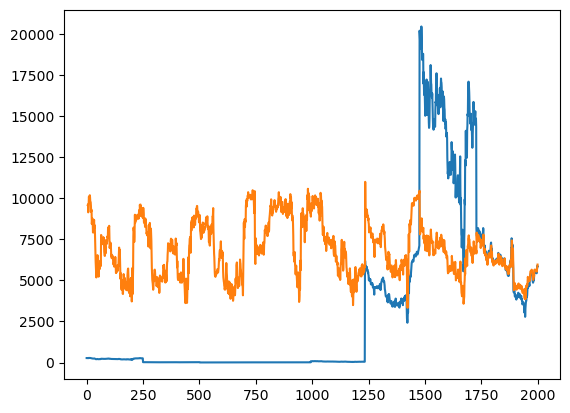

In [205]:
# Plotting

step_window=5

Test_data_series=Consol_data[Consol_data['Date']>'2020-12-31'].iloc[:,-1]
Train_data_series=Consol_data[Consol_data['Date']<='2020-12-31'].iloc[:,-1]

Train_data_array=np.array(Train_data_series)
Train_data_array=Train_data_array.reshape(-1,1)

Test_data_array=np.array(Test_data_series)
Test_data_array=Test_data_array.reshape(-1,1)

# Shifting train predictions for plotting
trainpredictplot=np.empty_like(Train_data_array)
trainpredictplot[:,:]=np.nan
trainpredictplot[step_window:len(train_predict)+step_window,:]=train_predict

testpredictplot=np.empty_like(Test_data_array)
testpredictplot[:,:]=np.nan
#testpredictplot[len(train_predict)+(step_window*2)+1:len(Test_data_series)-1,:]=test_predict
testpredictplot[len(train_predict)+(step_window*2)+1:len(Test_data_series)-1,:]=test_predict[: len(Test_data_series) - (len(Train_data_series) + (step_window * 2) + 1)]

plt.plot(Train_data_series.reset_index(drop=True))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


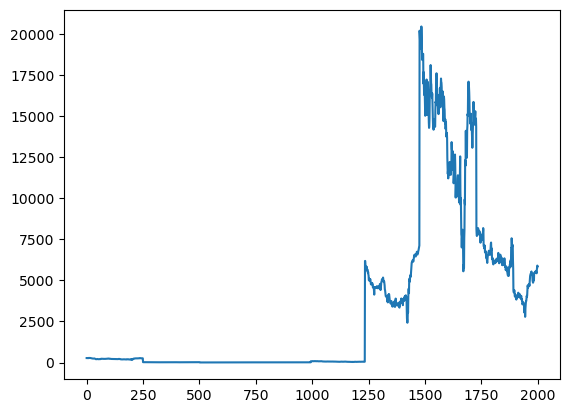

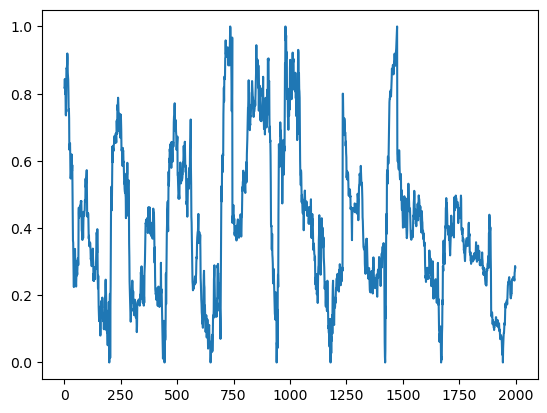

In [196]:
plt.plot(Train_data_Price_scaled)


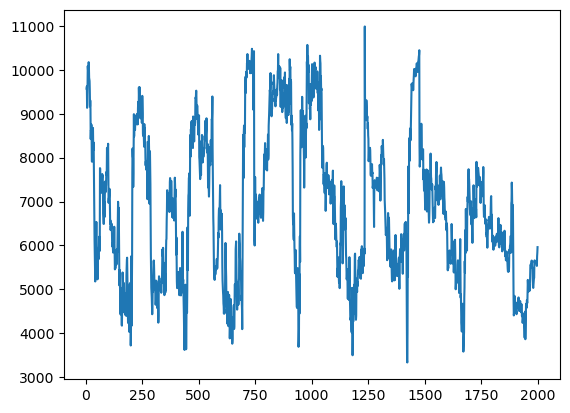

In [191]:
plt.plot(trainpredictplot)
